In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fake_devices import Grid5x5, FakeGuadalupe, Linear20
from algorithm.random_cnot_circuit import RandomCNOTCircuitsGenerator
from algorithm.mapping_sampler import DifferentialMappingSearch
from mindquantum.device import SABRE
from tqdm import tqdm
from sys import stdout
from IPython.display import display_svg
from mindquantum.io.display import draw_topology


circuits_dir = "circuits/"
circuits_file_name = "circuits_20_g80_150_q4_10.joblib"

device = Linear20()
# device = Grid5x5()
# device = FakeGuadalupe()

# test parameters
repeat = 10
no_extra = False

# # seed everything
# np.random.seed(42)

/home/kaibaiman/miniconda3/envs/mqsabre/lib/python3.9/site-packages/mindquantum/__init__.py:28: UserWarning: MindSpore not installed, you may not be able to use hybrid quantum classical neural network.
  from . import algorithm, config, core, engine, framework, io, simulator, utils


In [2]:
draw_topology(device.topology)

In [3]:
# first check if circuits are dumped to file.
circuits_dataset = RandomCNOTCircuitsGenerator(80, 150, 4, 10, 20)
try:
    circuits = circuits_dataset.load(circuits_file_name)
except:
    circuits = circuits_dataset.generate()
    circuits_dataset.dump(circuits_file_name)
circuits[0].svg()

In [4]:
# first run SABRE on all test circuits.
m_name = 'SABRE'
n_added_gates = np.zeros((len(circuits), repeat), dtype=int)
for circ in tqdm(circuits):
    solver = SABRE(circ, device.topology)
    for i in range(repeat):
        new_circ, _, _ = solver.solve(10, 0.5, 0.3, 0.2)
        n_added_gates[circuits.index(circ), i] = len(new_circ) - len(circ)
n_added_gates_mean = np.mean(n_added_gates, axis=1)
stdout.flush()

100%|██████████| 20/20 [00:01<00:00, 11.51it/s]


In [5]:
print(f"{m_name} mean added gates: {n_added_gates_mean}")
print(f"{m_name} total mean added gates: {np.mean(n_added_gates_mean)}")
stdout.flush()

SABRE mean added gates: [201.8  87.  168.  305.  107.  117.   80.   98.   80.  210.  268.  110.
 148.4 192.  194.  170.   83.4 103.  167.4 202. ]
SABRE total mean added gates: 154.6


In [12]:
# first run SABRE on all test circuits.
m_name = 'SABRE'
n_added_gates_s = np.zeros((len(circuits), repeat), dtype=int)
for circ in tqdm(circuits):
    solver = SABRE(circ, device.topology)
    for i in range(repeat):
        new_circ, _, _ = solver.solve(1, 0.5, 0.3, 0.2)
        n_added_gates_s[circuits.index(circ), i] = len(new_circ) - len(circ)
n_added_gates_mean = np.mean(n_added_gates_s, axis=1)
stdout.flush()

100%|██████████| 20/20 [00:01<00:00, 15.10it/s]


In [7]:
print(f"{m_name} mean added gates: {n_added_gates_mean}")
print(f"{m_name} total mean added gates: {np.mean(n_added_gates_mean)}")
stdout.flush()

SABRE mean added gates: [203.3  87.  168.6 306.4 107.3 117.   80.   98.   80.  213.2 268.7 113.
 155.  191.8 202.5 169.7  84.6 103.  164.9 194.5]
SABRE total mean added gates: 155.425


In [8]:
# first run SABRE on all test circuits.
m_name = 'SABRE'
n_added_gates = np.zeros((len(circuits), repeat), dtype=int)
for circ in tqdm(circuits):
    solver = SABRE(circ, device.topology)
    for i in range(repeat):
        new_circ, _, _ = solver.solve(100, 0.5, 0.3, 0.2)
        n_added_gates[circuits.index(circ), i] = len(new_circ) - len(circ)
n_added_gates_mean = np.mean(n_added_gates, axis=1)
stdout.flush()

100%|██████████| 20/20 [00:05<00:00,  3.59it/s]


In [9]:
print(f"{m_name} mean added gates: {n_added_gates_mean}")
print(f"{m_name} total mean added gates: {np.mean(n_added_gates_mean)}")
stdout.flush()

SABRE mean added gates: [201.   87.  168.  305.  107.  117.   80.   98.   80.  210.  265.  109.
 144.8 192.  194.  170.   84.2 103.  167.8 196.5]
SABRE total mean added gates: 153.965


In [10]:
# then run Differential Mapping Search on all test circuits.
m_name = 'Differential Mapping Search'
n_added_gates = np.zeros((len(circuits), repeat), dtype=int)
n_qubits = 25 if device.name == 'grid5x5' else 16
for circ in tqdm(circuits):
    n_lobits = circ.n_qubits
    solver = DifferentialMappingSearch(circ, device.topology, n_qubits, n_lobits, 
                                       no_extra, 0.5, 0.3, 0.2)
    for i in range(repeat):
        new_circ, _, _ = solver.solve(n_sample=4, n_iter=20, sabre_iter=1, lr=0.1)
        n_added_gates[circuits.index(circ), i] = len(new_circ) - len(circ)
n_added_gates_mean = np.mean(n_added_gates, axis=1)
stdout.flush()

100%|██████████| 20/20 [01:38<00:00,  4.92s/it]


SABRE mean added gates: [202.   87.  166.6 321.9 107.  117.   80.   98.   80.  214.1 264.4 112.5
 157.1 192.4 204.2 170.   83.8 103.  167.6 196.5]
SABRE total mean added gates: 156.255


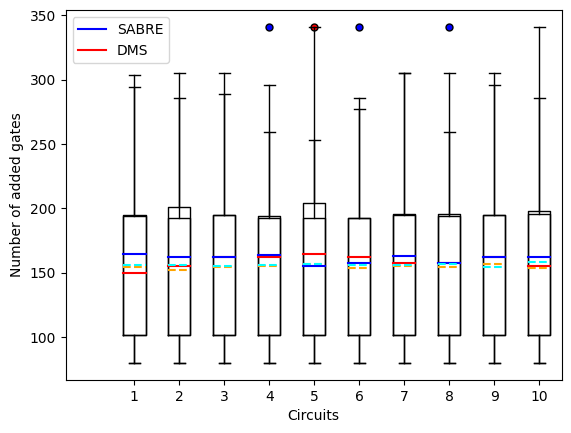

In [13]:
print(f"{m_name} mean added gates: {n_added_gates_mean}")
print(f"{m_name} total mean added gates: {np.mean(n_added_gates_mean)}")
stdout.flush()
plt.boxplot(n_added_gates,medianprops={'color': 'red', 'linewidth': '1.5'},
            meanline=True,
            showmeans=True,
            meanprops={'color': 'orange', 'ls': '--', 'linewidth': '1.5'},
            flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 5})
plt.boxplot(n_added_gates_s,medianprops={'color': 'blue', 'linewidth': '1.5'},
            meanline=True,
            showmeans=True,
            meanprops={'color': 'cyan', 'ls': '--', 'linewidth': '1.5'},
            flierprops={"marker": "o", "markerfacecolor": "blue", "markersize": 5})
plt.plot([80], label='SABRE', color='blue')
plt.plot([80], label='DMS', color='red')
plt.xticks(list(range(1,11)))
plt.legend()
plt.xlabel('Circuits')
plt.ylabel('Number of added gates')
plt.show()

In [12]:
# then run Differential Mapping Search on all test circuits.
m_name = 'Differential Mapping Search'
n_added_gates = np.zeros((len(circuits), repeat), dtype=int)
n_qubits = 25 if device.name == 'grid5x5' else 16
for circ in tqdm(circuits):
    n_lobits = circ.n_qubits
    solver = DifferentialMappingSearch(circ, device.topology, n_qubits, n_lobits, 
                                       no_extra, 0.5, 0.3, 0.2)
    for i in range(repeat):
        new_circ, _, _ = solver.solve(n_sample=4, n_iter=20, sabre_iter=10, lr=0.1)
        n_added_gates[circuits.index(circ), i] = len(new_circ) - len(circ)
n_added_gates_mean = np.mean(n_added_gates, axis=1)
stdout.flush()

100%|██████████| 20/20 [01:38<00:00,  4.94s/it]


In [13]:
print(f"{m_name} mean added gates: {n_added_gates_mean}")
print(f"{m_name} total mean added gates: {np.mean(n_added_gates_mean)}")
stdout.flush()

Differential Mapping Search mean added gates: [ 94.6  47.6  75.2 115.1  49.6  54.   47.4  48.6  36.1  92.5 111.3  46.2
  65.1  76.7  91.5  72.1  43.2  63.9  73.5  84.6]
Differential Mapping Search total mean added gates: 69.44
